In [411]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
import imblearn

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression



In [412]:
# Import data
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [413]:
train.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,target
0,-443.171017,-7.046932,-0.651368,s,False,l,-2.386104,-12.015035,-53.366720,294.178647,...,b,-263.102352,-0.828608,-5915.544513,14.297375,-0.299288,b,z2,x,0
1,-230.778558,-7.046932,-0.552333,s,NaN,l,-2.254475,-11.529238,-252.553855,346.713750,...,b,-133.804149,-1.111975,-5901.510546,43.164945,0.012027,b,k1,m,0


In [414]:
print(train.shape)
print(test.shape)

(7003, 31)
(1031, 31)


In [415]:
train=train.astype({'target':'str'})

# EDA

In [416]:
train.describe(percentiles=[0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9])
#standard deviation,mean , percentile calculation.

,X1,X2,X3,X7,X8,X9,X10,X11,X12,X14,X15,X16,X18,X19,X20,X23,X24,X25,X26,X27
count,7003.000000,7.003000e+03,7003.000000,7003.000000,7003.000000,7003.000000,7003.000000,7.003000e+03,7003.000000,0.0,7003.000000,7003.000000,3471.000000,7003.000000,7003.000000,7003.000000,7003.000000,7003.000000,7003.000000,7003.000000
mean,-78.321419,-6.383179e+00,-0.493113,-1.885915,-13.019560,-139.007019,663.904858,-5.105529e+07,10.657828,NaN,94.843551,228.632911,-1711.086796,233.912017,0.149115,-10.037580,-1.053825,-5900.840926,6.555755,0.002242
std,159.779054,2.048151e+00,0.249745,1.031458,2.164195,92.540394,621.866259,1.863097e+08,0.505128,NaN,88.838037,1171.583628,981.772625,93.979300,0.534265,894.980766,0.186151,11.861584,16.820283,0.219670
min,-614.267484,-7.046932e+00,-1.176045,-5.680359,-24.011577,-310.331768,0.000000,-2.342350e+09,6.915975,NaN,0.000000,-8622.666746,-4804.662638,1.505125,-1.341913,-3182.754789,-1.158478,-5946.986524,-21.140960,-0.813935
10%,-279.625369,-7.046932e+00,-0.845725,-3.337542,-15.937682,-274.021365,216.079562,-1.166187e+08,9.968346,NaN,30.868509,-735.390982,-2821.540555,110.812116,-0.477650,-951.892364,-1.158473,-5916.042224,-9.245804,-0.281004
20%,-214.246215,-7.046932e+00,-0.719455,-2.771803,-14.742449,-234.988732,257.585782,-4.290163e+07,10.322897,NaN,36.797969,-432.269929,-2516.429211,152.471100,-0.289138,-559.778939,-1.158301,-5910.782834,-6.339392,-0.184393
40%,-119.892357,-7.046932e+00,-0.542587,-2.035565,-13.119334,-166.196454,355.611574,-1.063425e+05,10.688487,NaN,50.801653,-133.750404,-2056.783493,209.138689,-0.021387,-255.596360,-1.153574,-5903.847276,-1.210654,-0.053081
50%,-78.315293,-7.046932e+00,-0.468574,-1.753579,-12.573455,-132.774757,420.288090,-1.439189e+04,10.810158,NaN,60.041156,2.245452,-1824.925672,232.313200,0.096150,-168.960941,-1.143952,-5900.801520,1.650621,0.001606
60%,-37.365360,-7.046932e+00,-0.395615,-1.463642,-12.111383,-100.469427,518.485898,-1.947731e+03,10.906080,NaN,74.069414,165.650814,-1579.400424,255.982480,0.216196,-1.742014,-1.120443,-5897.967232,5.484018,0.059991
70%,4.338326,-7.046932e+00,-0.327133,-1.209395,-11.673308,-68.761451,666.485452,-2.635967e+02,10.992107,NaN,95.212207,388.405365,-1294.994165,278.530157,0.354502,197.383121,-1.074876,-5894.735538,10.542536,0.118377


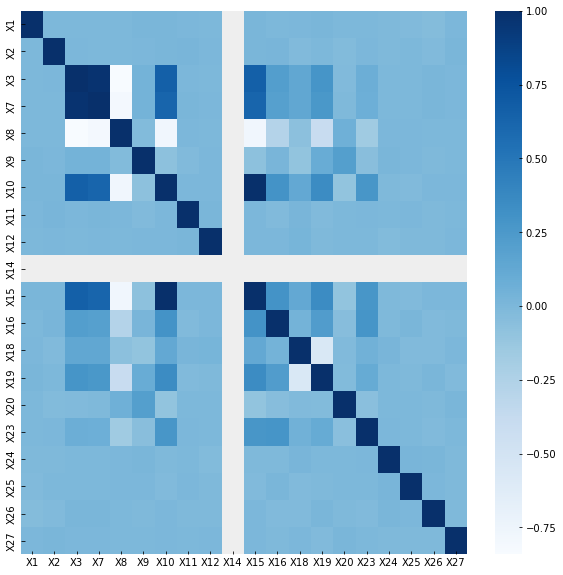

In [417]:
#coorelation plot
# With a correlation plot, we can found which variables are dependent on other variables
plt.figure(figsize=[10,10])
sns.heatmap(train.corr(),cmap="Blues")
plt.show()

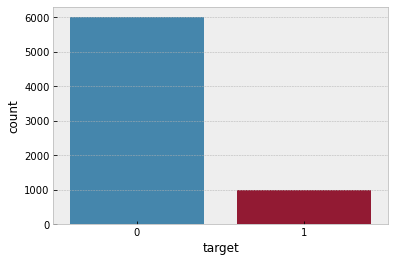

In [418]:
# Highly imbalanced data , huge difference between zero and one.
sns.countplot(train['target'])
plt.show()

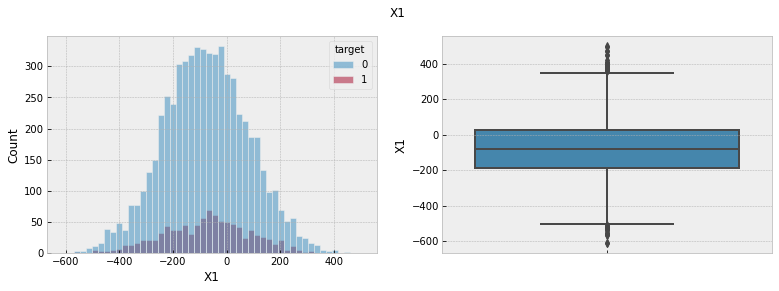

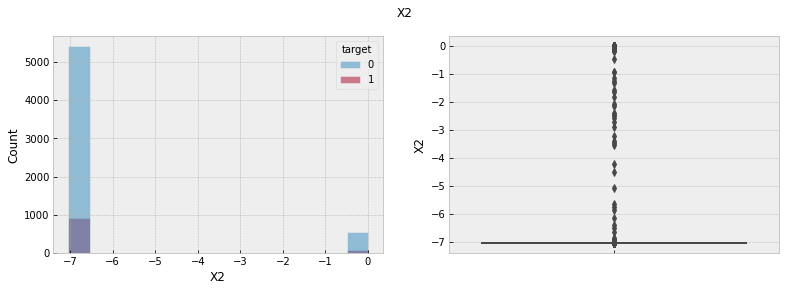

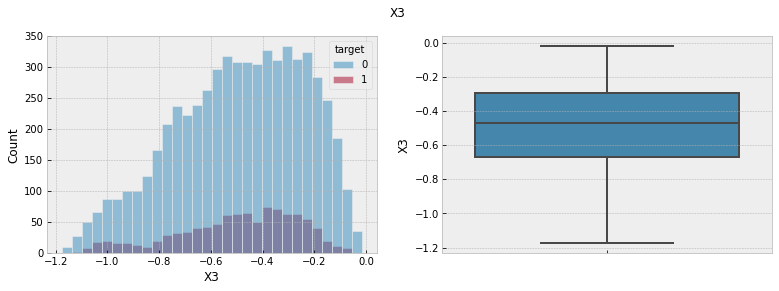

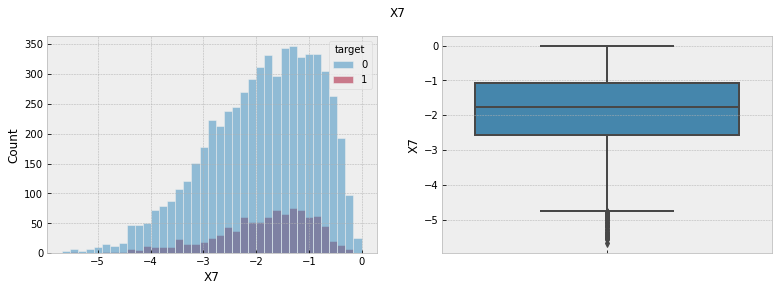

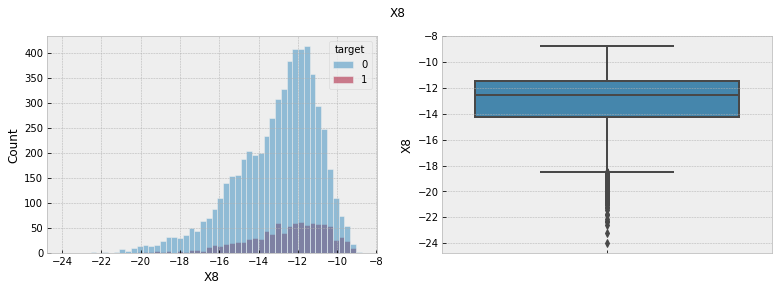

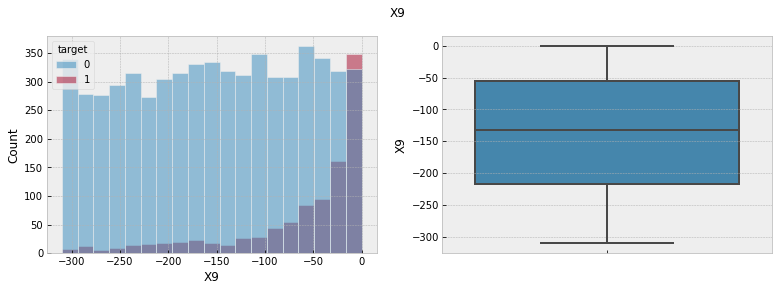

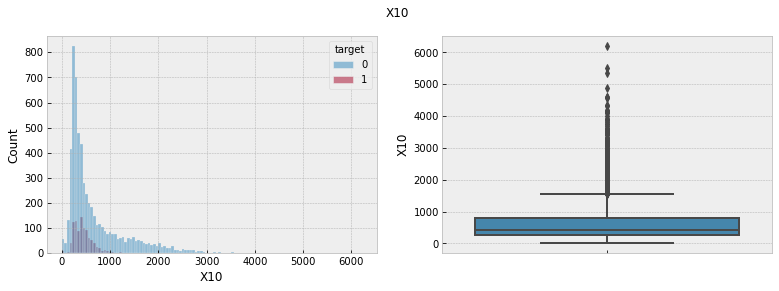

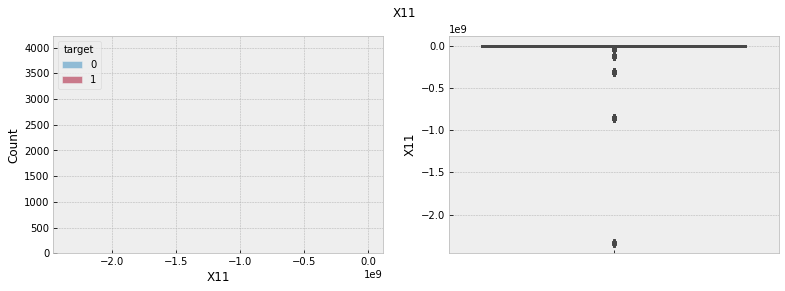

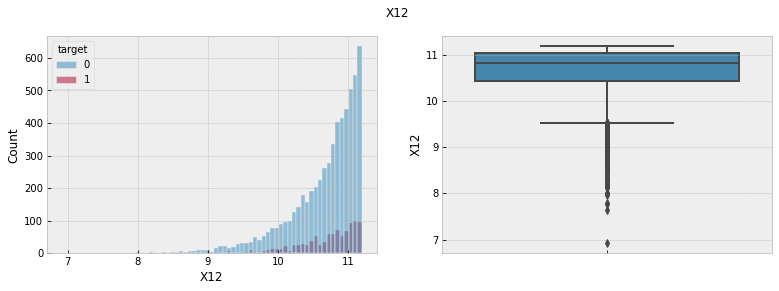

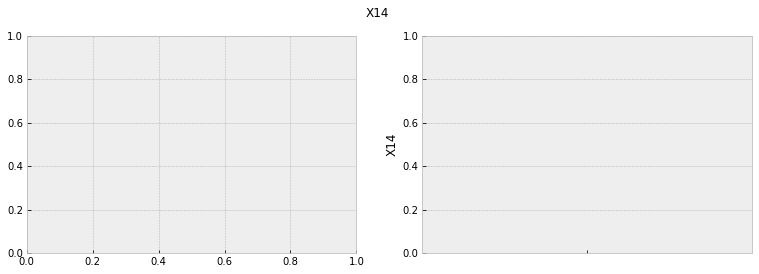

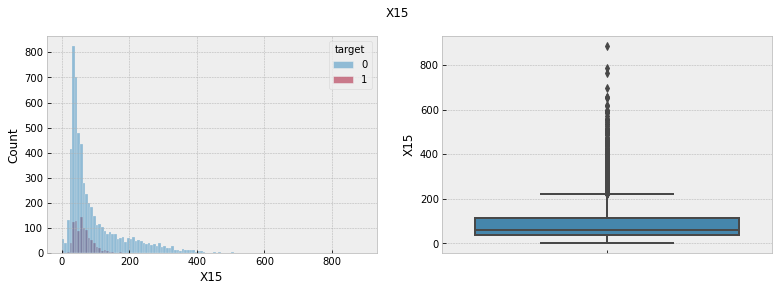

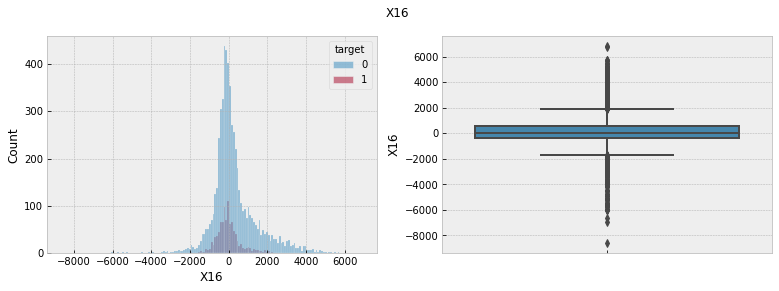

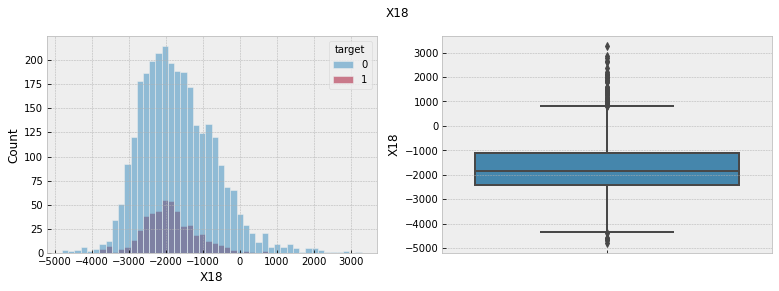

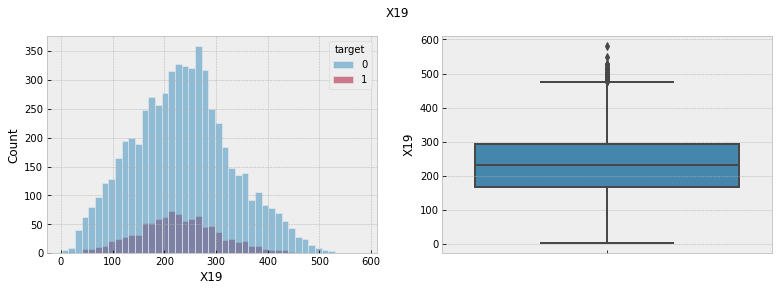

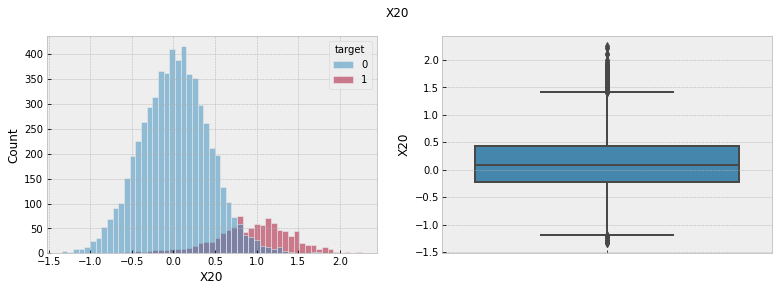

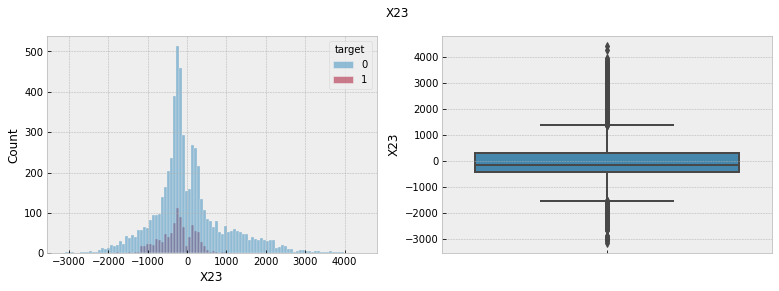

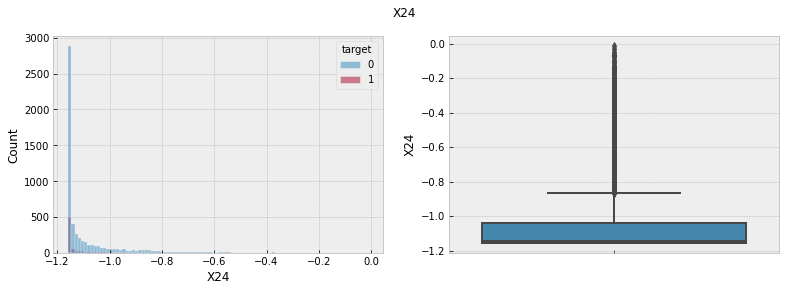

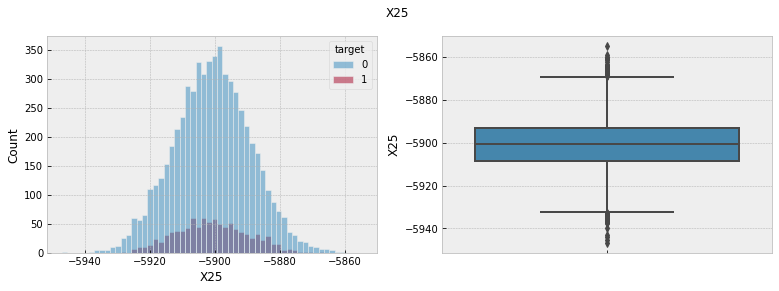

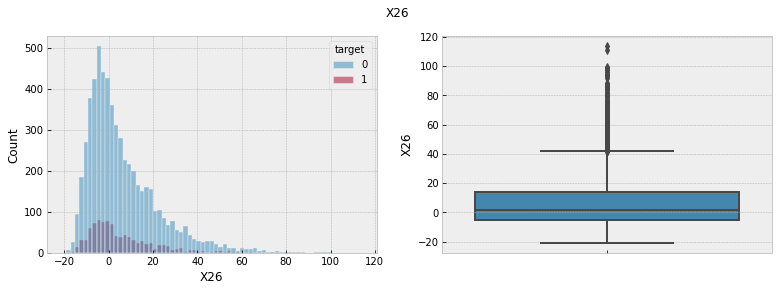

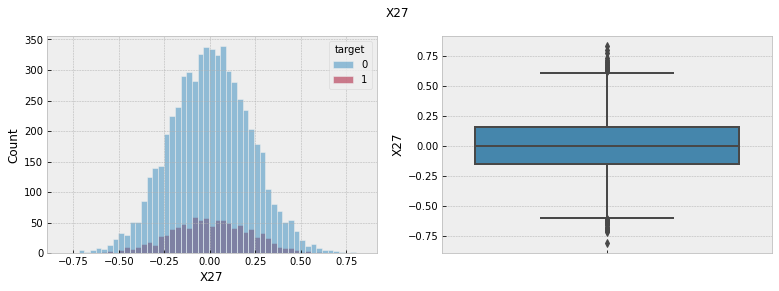

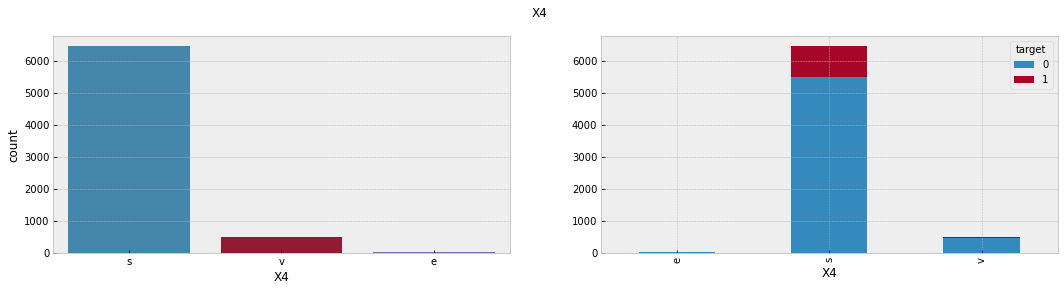

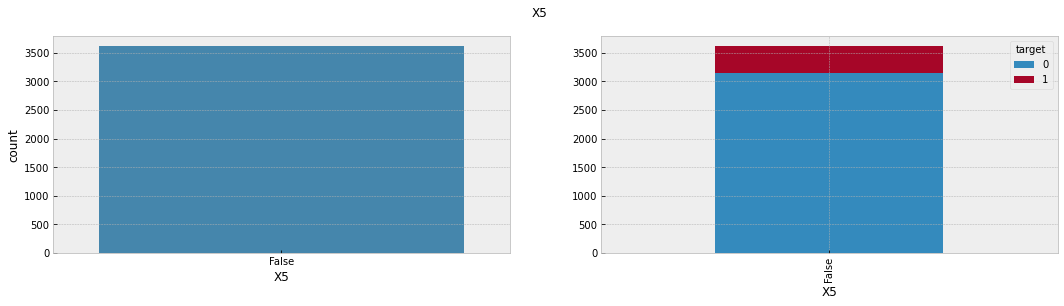

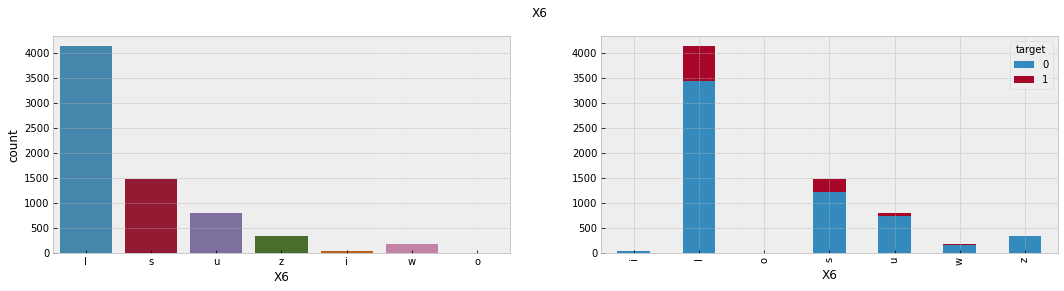

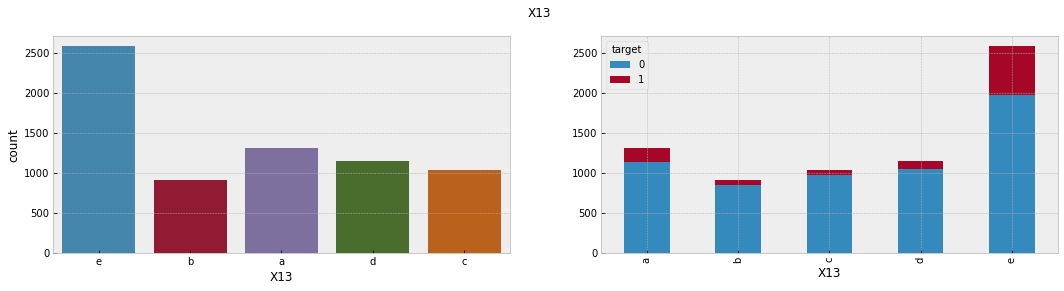

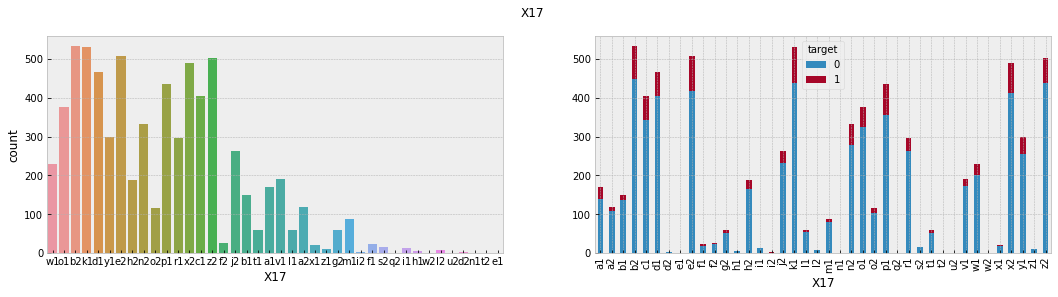

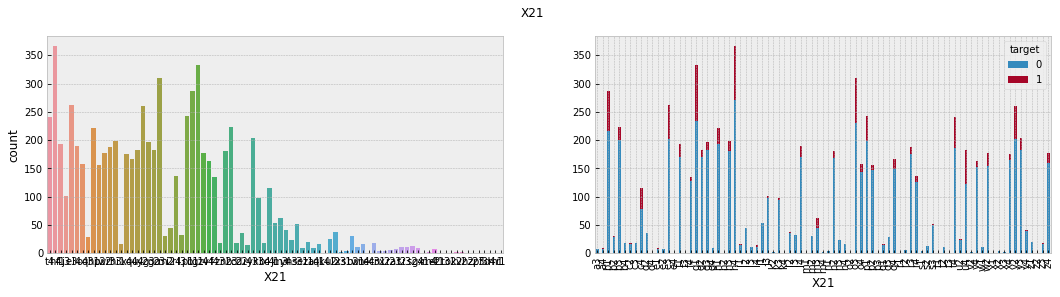

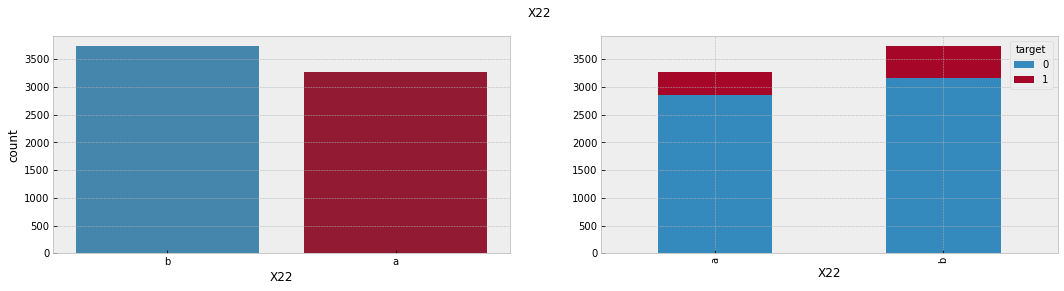

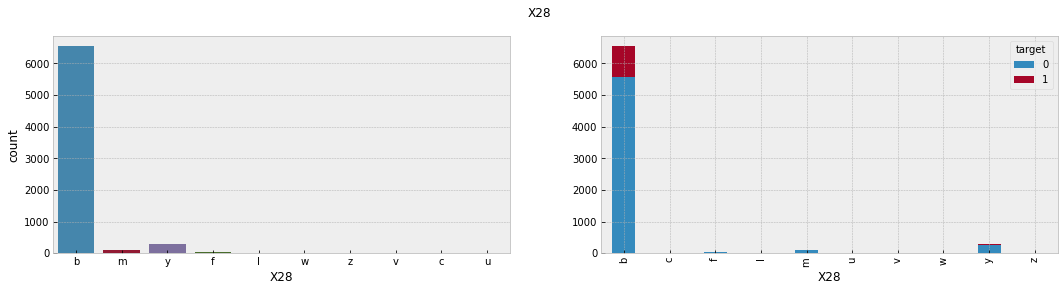

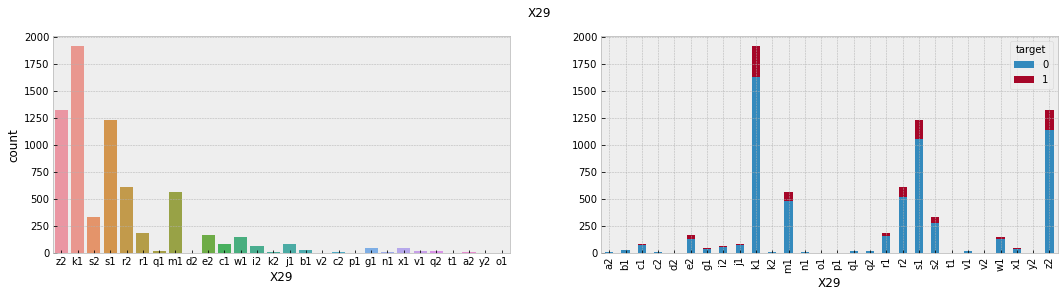

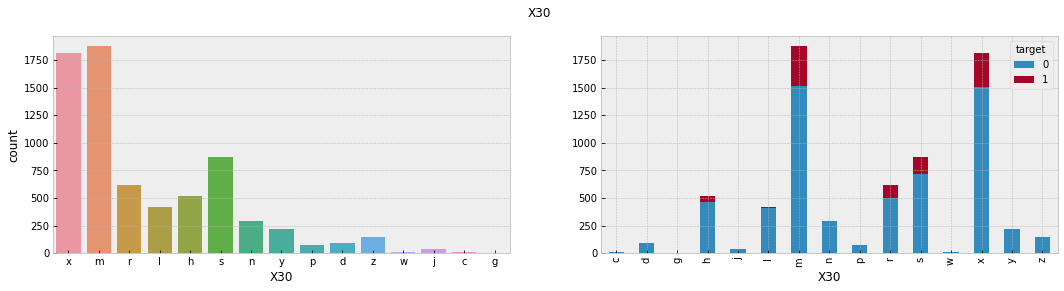

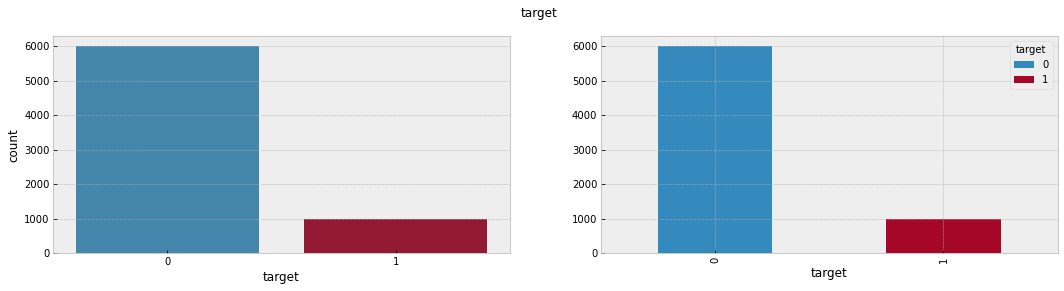

In [419]:
#plot- Distribution
def visualize(x):
  for i in x.select_dtypes(['int64','float64']):
         if train[i].dtype in ['float64','int64']:
            fig, axes=plt.subplots(ncols=2, nrows=1,figsize=[13,4])
            sns.histplot(ax= axes[0],
            data=train,
            x=i, hue="target",)
            sns.boxplot(y=train[i], ax= axes[1])
            # sns.barplot(train.)
            plt.suptitle(f'{i}')
  for i in x.select_dtypes('O'):
        if train[i].dtype in ['O']:
            fig, axes=plt.subplots(ncols=2, nrows=1,figsize=[18,4])
            sns.countplot(train[i],ax= axes[0])
            pd.crosstab(index=train[i], columns=train['target']).plot(kind='bar',stacked=True, ax= axes[1])
            plt.suptitle(f'{i}')

visualize(train)
    

Data preparation

In [420]:
train.isna().sum()

X1           0
X2           0
X3           0
X4           0
X5        3386
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14       7003
X15          0
X16          0
X17          0
X18       3532
X19          0
X20          0
X21          0
X22          0
X23          0
X24          0
X25          0
X26          0
X27          0
X28          0
X29          0
X30          0
target       0
dtype: int64

In [421]:
# Outlier treatment:
# We are trying to minimize the  outliers by clipping the continuous columns because outliers can affect the accuracy of our analysis.
def outlier(x):
    if x.dtype in ['float64','int64']:
        np.clip(x, a_max = x.quantile(0.95), a_min = x.quantile(0.05) )
    return x

train = train.apply(outlier)
test = test.apply(outlier)

In [422]:

# Missing value treatment:
#  For missing value treatment, we will fill the empty values with the mode for categorical variables and the median for 
#  continuous variables, but will only treat the variables where less than 20% of the values are missing.

def missing_treat(x):
    if x.dtype == 'O':
        if x.isna().mean()<0.2:
            x = x.fillna(x.mode()[0])  
    else:
        if x.isna().mean()<0.2:
            x = x.fillna(x.median())   
    return x

train=train.apply(missing_treat)
test=test.apply(missing_treat)

In [423]:
# Removing columns with higher NULL values:
# We will completely remove columns that have more than 20% missing values because filling them will not provide us with any 
# valuale information
train.drop(columns=['X14','X5','X18'],axis=1,inplace=True) 
test.drop(columns=['X14','X5','X18'],axis=1,inplace=True)

In [424]:
# Splitting the data in features and target variables
y_train= train['target'].astype('int64')
x_train= train.drop(columns=['target'])
y_test= test['target'].astype('int64')
x_test= test.drop(columns=['target'])

In [425]:
# Combining the categories:
# Some categorical columns have categories that are very rare (< 3% of total records), it is better to combine all those categories in 
# a single category
for col in x_train.select_dtypes('O'): 
    b=[]   
    a=x_train[col].value_counts(normalize=True).to_frame()
    a=a[a[col]<0.03].index.values
    for i in a:
        b.append(i)
    if col != 'X21':
        x_train[col]=np.where(x_train[col].isin(b),'Others',x_train[col])
        x_test[col]=np.where(x_test[col].isin(b),'Others',x_test[col])

In [426]:
cont=x_train.select_dtypes(include=['int64','float64']).columns
cat=x_train.select_dtypes('O').columns

In [427]:
# Standardization
# Most of the ML algorithms works better when the variables are on a relatively similar scale. 
# Standardscaler does that by using the mean and variance

scaler = StandardScaler()
scaler.fit(x_test[cont])
x_train[cont]=pd.DataFrame(scaler.fit_transform(x_train[cont]),columns=x_train[cont].columns)
x_test[cont]=pd.DataFrame(scaler.fit_transform(x_test[cont]),columns=x_test[cont].columns)


In [428]:
# Encoding- onehot 
# ML algorithms can only take numerical data as input so we encode the categorical variables using one-hot encoder. 
# It creates a new column for each category with binary values
x_train= pd.get_dummies(x_train, drop_first=True)
x_test= pd.get_dummies(x_test, drop_first=True)

In [429]:
# Balancing
# It is very important to train the model on a dataset with almost the same number of samples. Usually, that is not the case
# so we use over-sampling to create equal number of samples for each target category.
balancer= SMOTE()
x_train_new, y_train_final = balancer.fit_resample(x_train, y_train)

# Feature selection

In [430]:
# Feature selection by RFE
# Recursive Feature Elimination is an algorithm used to eliminate irrelevant features. 
# RandomForestClassifier algorithm is used as the core for RFE to help in selecting the features
rfe_model= RFE(RandomForestClassifier(),n_features_to_select=60,verbose=True).fit(x_train_new, y_train_final)
l1 = x_train_new[x_train_new.columns[rfe_model.support_]].columns

Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
F

In [431]:
# Feature selection by SelectKBest
# SelectKBest is a feature selection method that works by taking the highet k score. For classifacation function, 'chi2' is
# used as the scoring function.

sk= SelectKBest(score_func=f_classif, k=60).fit(x_train_new,y_train_final)
l2 = x_train_new[x_train_new.columns[sk.get_support()]].columns

In [432]:
# We will use the variables given by both RFE and SelectKBest
l3= set(l1).intersection(l2)
x_train_new=x_train_new[l3]
x_test_new=x_test[l3]

In [433]:
# By VIF
# VIF is the measure of multicollinearity. Multicollinearity is present if there is correlation between two variables.
# It is important to remove those columns because they can affect our analysis output.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x, drop=[]):
    x = x.drop(columns = drop)
    output = pd.DataFrame()
    output['columns'] = x.columns
    x= x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    return output.sort_values(by='VIF', ascending= False)

In [436]:
d = VIF(x_train_new,drop = ['X10','X15'])
l_final=d['columns']
d

,columns,VIF
33,X6_l,3.411966
12,X13_e,2.233107
1,X9,2.076925
9,X6_u,2.065679
4,X30_m,1.707850
8,X30_l,1.635686
14,X8,1.591016
2,X20,1.568794
26,X29_k1,1.555348
27,X13_b,1.514249


In [437]:
x_train_new= x_train_new[l_final]
x_test= x_test[l_final]

In [438]:
l_final.__len__()

37

In [439]:
x_train_final= x_train_new[l_final]
x_test_final= x_test[l_final]

# Model

Logistic regression

In [441]:
L_model = LogisticRegression().fit(x_train_final, y_train_final)

In [442]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train_final, L_model.predict_proba(x_train_final)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, L_model.predict_proba(x_test_final)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train_final.astype('float64'), L_model.predict(x_train_final)))
print('Test accuracy:',metrics.accuracy_score(y_test.astype('float64'), L_model.predict(x_test_final)))

print('Train recall:',metrics.recall_score(y_train_final.astype('float64'), L_model.predict(x_train_final)))
print('Test recall:',metrics.recall_score(y_test.astype('float64'), L_model.predict(x_test_final)))

print('Train precision:',metrics.precision_score(y_train_final.astype('float64'), L_model.predict(x_train_final)))
print('Test precision:',metrics.precision_score(y_test.astype('float64'), L_model.predict(x_test_final)))

Train roc_auc score: 0.9812390434245923
Test roc_auc_score: 0.6799882257041935
Train accuracy: 0.9334499416958187
Test accuracy: 0.6091173617846751
Train recall: 0.9328668998833917
Test recall: 0.3073770491803279
Train precision: 0.933955970647098
Test precision: 0.6976744186046512


KNN

In [ ]:
# # Finding the best parameters: Every machine learning algorithm takes some parameters are input, 
# # to find these parameters, we use GridsearchCV


# param_grid = {'n_neighbors':[6,7,8,9,10], 'weights': ['distance', 'uniform']}
# knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5, verbose=True, n_jobs=4)
# knn_model= knn_grid.fit(x_train_final, y_train_final)
# knn_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_neighbors': 10, 'weights': 'distance'}

In [443]:
knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_model= knn_model.fit(x_train_final,y_train_final)

In [444]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train_final, knn_model.predict_proba(x_train_final)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, knn_model.predict_proba(x_test_final)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train_final.astype('float64'), knn_model.predict(x_train_final)))
print('Test accuracy:',metrics.accuracy_score(y_test.astype('float64'), knn_model.predict(x_test_final)))

print('Train recall:',metrics.recall_score(y_train_final.astype('float64'), knn_model.predict(x_train_final)))
print('Test recall:',metrics.recall_score(y_test.astype('float64'), knn_model.predict(x_test_final)))

print('Train precision:',metrics.precision_score(y_train_final.astype('float64'), knn_model.predict(x_train_final)))
print('Test precision:',metrics.precision_score(y_test.astype('float64'), knn_model.predict(x_test_final)))




Train roc_auc score: 1.0
Test roc_auc_score: 0.7335235334963621
Train accuracy: 1.0
Test accuracy: 0.6653734238603298
Train recall: 1.0
Test recall: 0.5102459016393442
Train precision: 1.0
Test precision: 0.7014084507042253


Random forest

In [ ]:
# RF_para_grid= {
#     'max_depth': [5,6,7],
#     'max_leaf_nodes':[20,30,40],
#     'n_estimators':[50,60,70],
#     'max_features':[20,30,40]
# }
# gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
#                         param_grid=RF_para_grid, 
#                         cv=5,
#                         verbose=True, n_jobs=4, scoring='roc_auc').fit(x_train_final, y_train_final)

# gscv_Rf.best_params_

In [445]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 7, max_features=20, max_leaf_nodes= 40,n_jobs=-1)
radm_clf.fit( x_train_final, y_train_final )

RandomForestClassifier(max_depth=7, max_features=20, max_leaf_nodes=40,
                       n_jobs=-1, oob_score=True)

In [447]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train_final, radm_clf.predict_proba(x_train_final)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, radm_clf.predict_proba(x_test_final)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train_final.astype('float64'), radm_clf.predict(x_train_final)))
print('Test accuracy:',metrics.accuracy_score(y_test.astype('float64'), radm_clf.predict(x_test_final)))

print('Train recall:',metrics.recall_score(y_train_final.astype('float64'), radm_clf.predict(x_train_final)))
print('Test recall:',metrics.recall_score(y_test.astype('float64'), radm_clf.predict(x_test_final)))

print('Train precision:',metrics.precision_score(y_train_final.astype('float64'), radm_clf.predict(x_train_final)))
print('Test precision:',metrics.precision_score(y_test.astype('float64'), radm_clf.predict(x_test_final)))


Train roc_auc score: 0.9802824030818729
Test roc_auc_score: 0.7377332216284755
Train accuracy: 0.9328668998833917
Test accuracy: 0.6440349175557711
Train recall: 0.9232050641345994
Test recall: 0.4569672131147541
Train precision: 0.9413962969254289
Test precision: 0.6861538461538461
